In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Media_addiction.csv')
df_original = df.copy()

In [2]:
df_original

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\664475467.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\664475467.py:13: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  barplot = sns.barplot(


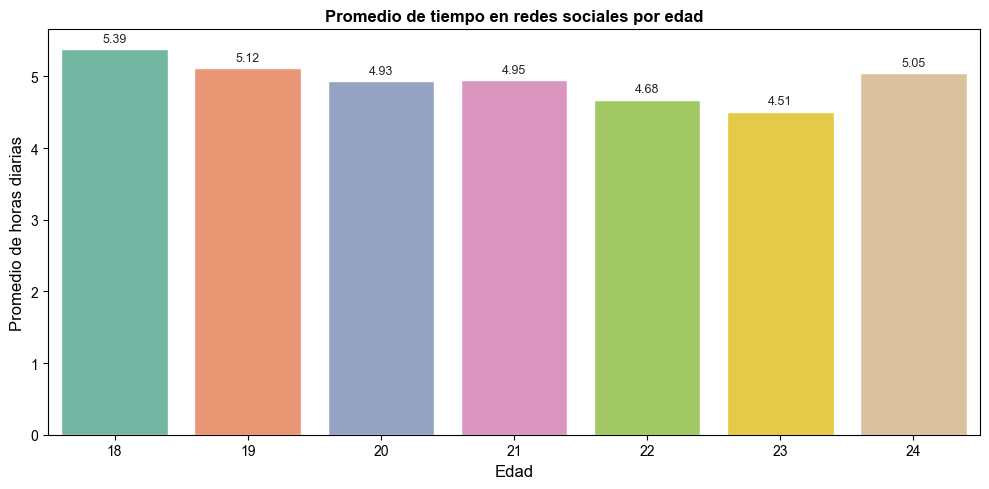

In [3]:

fig , ax = plt.subplots(figsize=(10, 5))

# Estilo general
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')

# Agrupar los datos
df_plot = df_original.groupby('Age')['Avg_Daily_Usage_Hours'].mean().reset_index(name='promedio_de_horas')
df_plot['Country'] = df_original['Country']
df_plot = df_plot.sort_values(by='promedio_de_horas', ascending=False)

# Gráfico de barras
barplot = sns.barplot(
    data=df_plot,
    x='Age',
    y='promedio_de_horas',
    palette=palette,
    ax = ax
)
# Títulos y etiquetas
ax.set_title('Promedio de tiempo en redes sociales por edad', fontweight='bold')
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Promedio de horas diarias', fontsize=12)
plt.tight_layout()

#agregamos sus valores

for i,row in df_plot.iterrows():
    ax.text(
        x=i,
        y=row['promedio_de_horas'] + 0.1,
        s=f"{row['promedio_de_horas']:.2f}",
        ha='center',
        fontsize=9
    )


C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\1268199609.py:9: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(


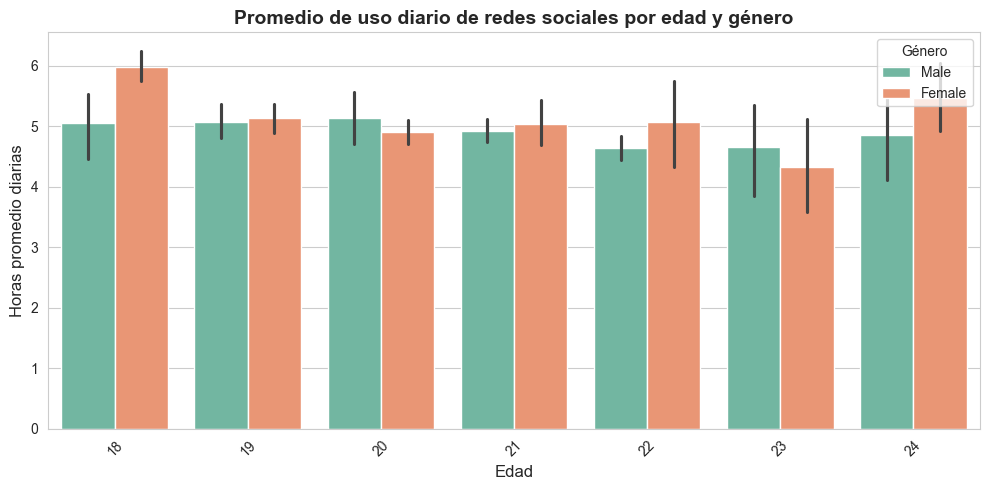

In [4]:
# Estilo visual
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')

# Crear figura
plt.figure(figsize=(10, 5))

# Gráfico de barras
sns.barplot(
    data=df,
    x='Age',
    y='Avg_Daily_Usage_Hours',
    hue='Gender',
    palette=palette,
    errorbar='ci'  # Muestra la variabilidad con barras de error
)

# Títulos y etiquetas
plt.title('Promedio de uso diario de redes sociales por edad y género', fontsize=14, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Horas promedio diarias', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper right')
plt.tight_layout()
plt.show()

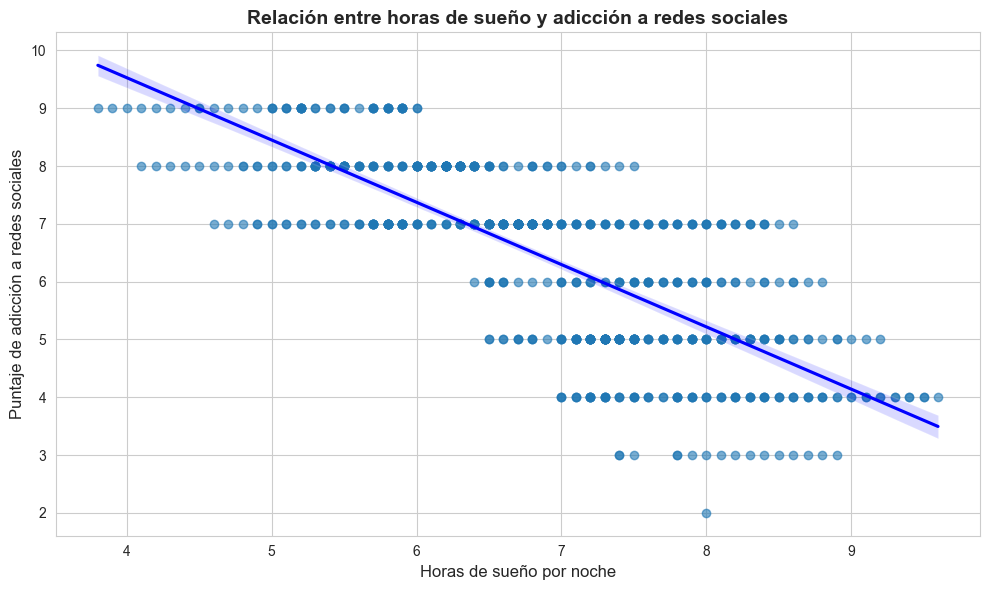

In [5]:
sns.set_style('whitegrid')
palette = sns.color_palette('Set2')

plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión
sns.regplot(
    data=df,
    x='Sleep_Hours_Per_Night',
    y='Addicted_Score',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'blue'},
)

plt.title('Relación entre horas de sueño y adicción a redes sociales', fontsize=14, fontweight='bold')
plt.xlabel('Horas de sueño por noche', fontsize=12)
plt.ylabel('Puntaje de adicción a redes sociales', fontsize=12)
plt.tight_layout()



C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\404296076.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


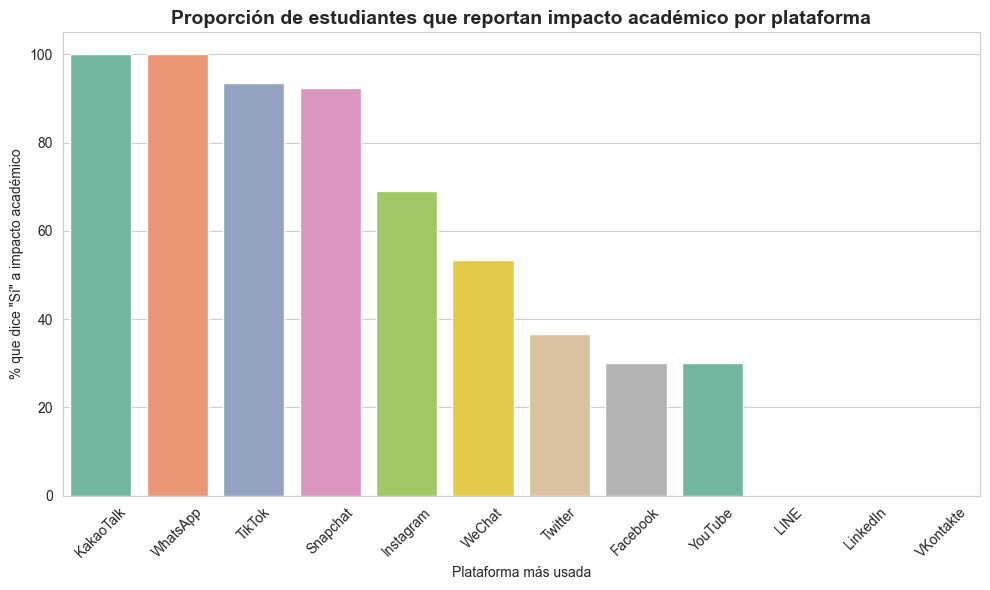

In [6]:
#🎓 3. ¿Qué plataformas afectan más el rendimiento académico?
# 1. Crear tabla con proporción de "Yes" por plataforma
df_platform_impact = df.groupby('Most_Used_Platform')['Affects_Academic_Performance'].value_counts(normalize=True).unstack().fillna(0)

# 2. Crear columna de porcentaje de "Yes"
df_platform_impact['Impacta (%)'] = df_platform_impact['Yes'] * 100

# 3. Ordenar de mayor a menor
df_platform_impact = df_platform_impact.sort_values(by='Impacta (%)', ascending=False)

# 4. Visualización
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_platform_impact.reset_index(),
    x='Most_Used_Platform',
    y='Impacta (%)',
    palette='Set2'
)

# Títulos y etiquetas
plt.title('Proporción de estudiantes que reportan impacto académico por plataforma', fontsize=14, fontweight='bold')
plt.xlabel('Plataforma más usada')
plt.ylabel('% que dice "Sí" a impacto académico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
#📱 5. ¿Qué grupo académico es más adicto a redes?

df_g = df_original.groupby('Academic_Level')['Addicted_Score'].mean().reset_index(name='promedio_adiccion').sort_values(by='promedio_adiccion',ascending=False)
df_g

,Academic_Level,promedio_adiccion
1,High School,8.037037
2,Undergraduate,6.492918
0,Graduate,6.243077


C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\4140459117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\4140459117.py:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  barplot = sns.barplot(


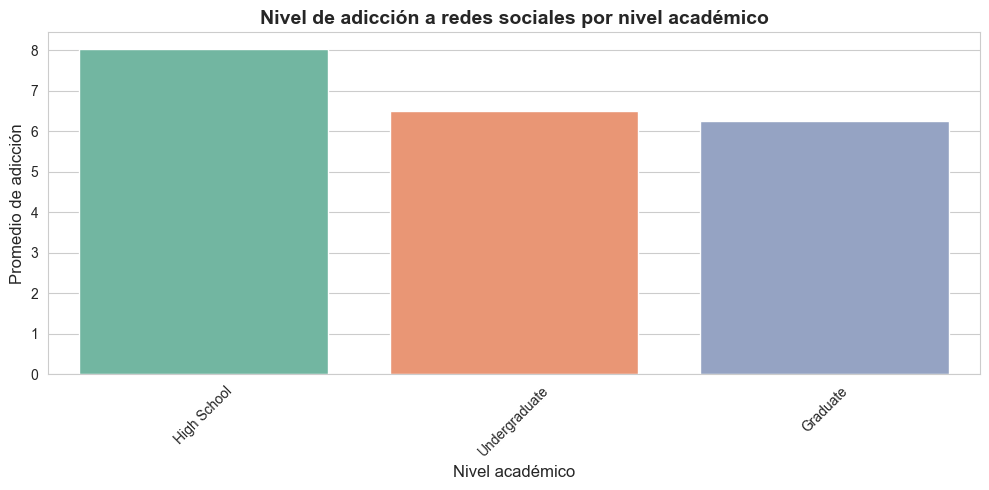

In [8]:
# Estilo general
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Tamaño del gráfico
plt.figure(figsize=(10, 5))

# Gráfico de barras
barplot = sns.barplot(
    data=df_g,
    x='Academic_Level',
    y='promedio_adiccion',
    palette=palette
)

# Título y ejes
plt.title('Nivel de adicción a redes sociales por nivel académico', fontsize=14, fontweight='bold')
plt.xlabel('Nivel académico', fontsize=12)
plt.ylabel('Promedio de adicción', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

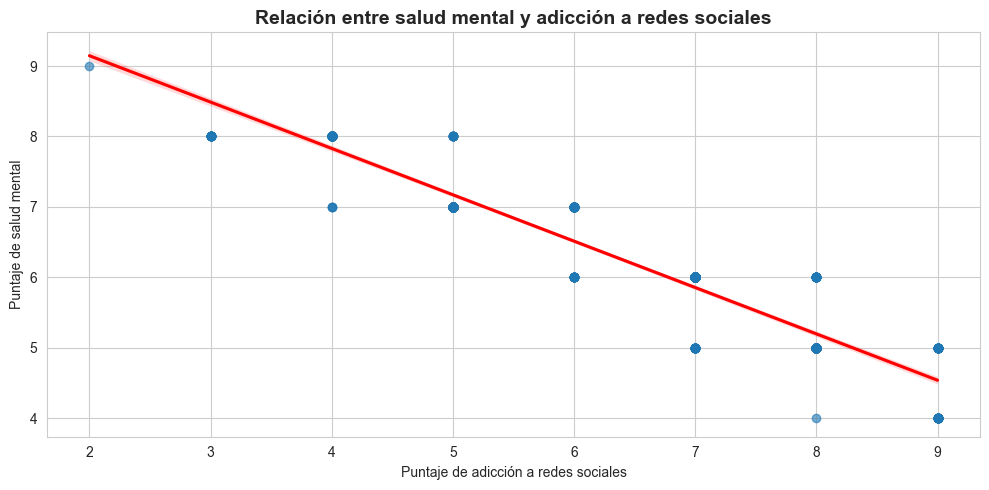

In [9]:
#🧠 6. Relación entre salud mental y adicción
# Estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Gráfico de dispersión con línea de tendencia (regresión)
sns.regplot(
    data=df,
    x='Addicted_Score',
    y='Mental_Health_Score',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
)

# Títulos y etiquetas
plt.title('Relación entre salud mental y adicción a redes sociales', fontsize=14, fontweight='bold')
plt.xlabel('Puntaje de adicción a redes sociales')
plt.ylabel('Puntaje de salud mental')
plt.tight_layout()
plt.show()


In [16]:
#paises con mas consumo de redes sociales

df_countrys = df_original.groupby('Country')['Avg_Daily_Usage_Hours'].mean().reset_index(name='promedio_horas').sort_values(by='promedio_horas',ascending=False).head(7)
df_countrys



,Country,promedio_horas
102,USA,6.890000
100,UAE,6.725000
61,Mexico,6.422222
27,Ecuador,6.300000
39,India,6.116981
25,Czech Republic,6.100000
97,Thailand,5.900000


C:\Users\alejandrozuluaga\AppData\Local\Temp\ipykernel_1044\2273280119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


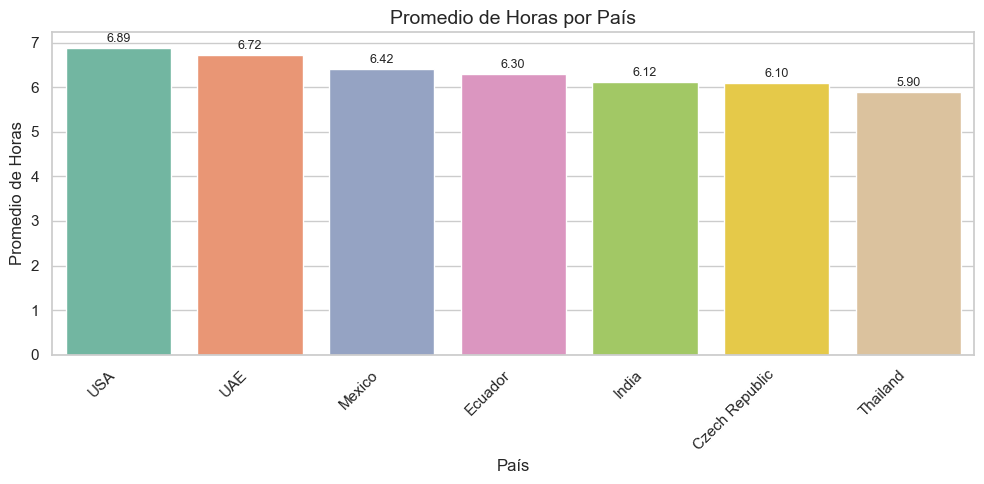

In [20]:

# Estilo general
sns.set(style="whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(10, 5))

# Gráfico de barras
barplot = sns.barplot(
    data=df_countrys,
    y='promedio_horas',
    x='Country',
    palette='Set2'  # Puedes probar también 'coolwarm', 'viridis', etc.
)

# Mostrar los valores encima de las barras
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f', label_type='edge', padding=2, fontsize=9)

# Rotar etiquetas si son muchas o largas
plt.xticks(rotation=45, ha='right')

# Títulos y etiquetas
plt.title('Promedio de Horas por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio de Horas', fontsize=12)

# Acomodar elementos
plt.tight_layout()
